In [1]:
# import the necessary packages

from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2


#construct the argument parser and parse the arguments

ap = argparse.ArgumentParser()
ap.add_argument("-p", "/home/arundhati/Downloads/shape_predictor_68_face_landmarks.dat/data.bin", required=True)
ap.add_argument("-i", "/home/arundhati/cv/dlib/27.jpg", required=True)
args = vars(ap.parse_args())


In [10]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["/home/arundhati/Downloads/shape_predictor_68_face_landmarks.dat"])


NameError: name 'args' is not defined

In [ ]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



In [ ]:
# detect faces in the grayscale image
rects = detector(gray, 1)


In [ ]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
 
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
 
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
 
# show the output image with the face detections + facial landmarks
cv2.imshow("Output", image)
cv2.waitKey(0)

NEW ALGORITM

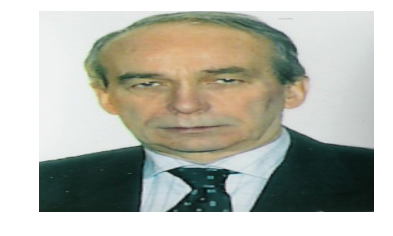

In [35]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
image=cv2.imread('27.jpg')
small = cv2.resize(image, (0,0), fx=20, fy=12) 
plt.axis("off")
plt.imshow(cv2.cvtColor(small, cv2.COLOR_BGR2RGB))
plt.show()


In [19]:
import cv2
import dlib
import numpy
import matplotlib.pyplot as plt


PREDICTOR_PATH = "/home/arundhati/cv/dlib_project/shape_predictor_68_face_landmarks.dat/data"

predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()


def get_landmarks(im):
    rects = detector(im, 1)
    return numpy.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im,landmarks):
        im=im.copy()
        for idx,point in enumerate(landmarks):
                pos=(point[0,0],point[0,1])
                cv2.putText(im,str(idx),pos,fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale=0.4,color=(0,0,255))
                cv2.circle(im,pos,3,color=(0,255,255))
        return im
    
image=cv2.imread('27.jpg')
landmarks=get_landmarks(image)
image_with_landmarks=annotate_landmarks(image,landmarks)


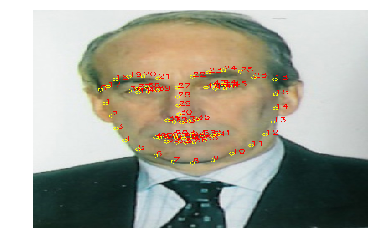

In [29]:
plt.axis("off")
plt.imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB),aspect='auto')
plt.show()